<a href="https://colab.research.google.com/github/AmazingGrace-D/Autoregressive-model/blob/main/AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam, SGD

In [3]:
print(tf.__version__)

2.4.0


In [4]:
sineseries = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1 # with noise
#sineseries = np.sin(0.1*np.arange(200)) # without noise
cosseries = np.cos(0.1*np.arange(200))  #cos wave

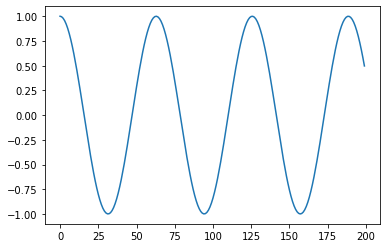

In [5]:
plt.plot(cosseries)

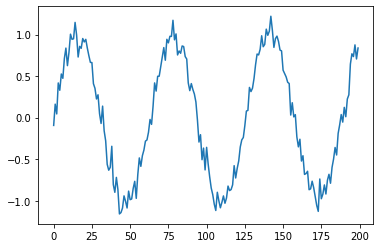

In [6]:
plt.plot(sineseries)

In [7]:
# Trying to predict the last point from the last 10 points

T = 10
X = []
Y = []

for t in range(len(sineseries) - T):
  x = sineseries[t:t+T]
  X.append(x)
  y = sineseries[t+T]
  Y.append(y)
  # print(t, x, y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [8]:
# Build the Autoregressive linear model

i = Input(shape=(T, ))
x = Dense(1)(i)
model = Model(i, x)

model.compile(
    loss = 'mse',
    optimizer = SGD(lr=0.01, momentum=0.9, decay=0.001)
)

# Training
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=100,
    validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/100
3/3 [==============================] - 1s 161ms/step - loss: 2.0171 - val_loss: 0.7842
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 0.5598 - val_loss: 0.2095
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 0.3601 - val_loss: 0.8299
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 0.8766 - val_loss: 0.5436
Epoch 5/100
3/3 [==============================] - 0s 21ms/step - loss: 0.4076 - val_loss: 0.0738
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0896 - val_loss: 0.1959
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 0.2531 - val_loss: 0.2496
Epoch 8/100
3/3 [==============================] - 0s 18ms/step - loss: 0.2429 - val_loss: 0.0662
Epoch 9/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0644 - val_loss: 0.0517
Epoch 10/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0714 - val_loss: 0.1166
Epoch 11/100
3/3 [

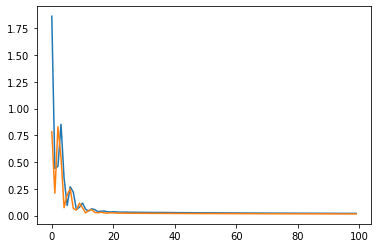

In [9]:
# Plot loss and accuracy

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

In [10]:
i = -N//2
p = model.predict(X[i].reshape(1, -1))[0, 0]
print(p, i)

-0.84452885 -95


In [11]:
# 'Wrong' forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0, 0]
  validation_predictions.append(p)

  i+=1

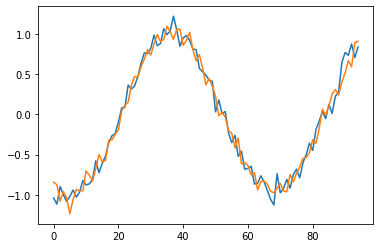

In [12]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast_predictions')
plt.show()

In [13]:
last_x = X[-N//2]
last_x

array([-0.29336845, -0.20509897, -0.50582052, -0.36604411, -0.62846278,
       -0.35712058, -0.55602809, -0.71167502, -0.8453517 , -0.92468617])

In [14]:
# forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]
# print(last_x)

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0, 0]

  # update the predictions list
  validation_predictions.append(p)

  # make new input
  last_x = np.roll(last_x, -1)
  # print(last_x)
  last_x[-1] = p
  # print(last_x)

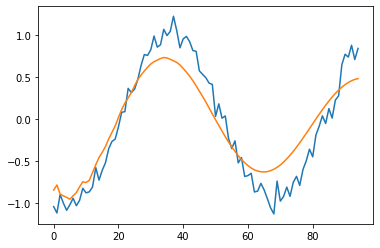

In [15]:
plt.plot(validation_target, label='validation_target')
plt.plot(validation_predictions, label='validation_predictions')